In [905]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [906]:
imdb_principals = pd.read_csv("title.principals.tsv.gz", sep='\t') #imdb title.principals
imdb_names = pd.read_csv("name.basics.tsv.gz", sep='\t') #imdb name.basics
imdb_basics = pd.read_csv("title.basics.tsv.gz", sep='\t') #imdb title.basics
#takes about 2 mins

C:\Users\Ryan\AppData\Local\Temp\ipykernel_27868\1710752316.py:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  imdb_basics = pd.read_csv("title.basics.tsv.gz", sep='\t') #imdb title.basics


DATA FROM IMDB Non-commercial datasets

In [907]:
tmdb = pd.read_csv('tmdb_movies_data.csv', encoding='utf-8').drop_duplicates()
oscars = pd.read_csv('the_oscar_award.csv', encoding='utf-8').drop_duplicates()

In [908]:
tmdb.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [909]:
tmdb['profit'] = tmdb['revenue_adj'] - tmdb['budget_adj']
tmdb

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,95,Documentary,Bruce Brown Films,6/15/1966,11,7.4,1966,0.000000e+00,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/1966,20,5.7,1966,0.000000e+00,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,94,Mystery|Comedy,Mosfilm,1/1/1966,11,6.5,1966,0.000000e+00,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,80,Action|Comedy,Benedict Pictures Corp.,11/2/1966,22,5.4,1966,0.000000e+00,0.000000e+00,0.000000e+00


In [910]:
tmdb['budget_adj'] /= 1000000
tmdb['profit'] /= 1000000

DATA FROM TMDB, https://www.kaggle.com/datasets/juzershakir/tmdb-movies-dataset
DATA oscars, https://www.kaggle.com/datasets/unanimad/the-oscar-award

In [911]:
imdb_principals.head()

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,\N,"[""Self""]"
1,tt0000001,2,nm0005690,director,\N,\N
2,tt0000001,3,nm0374658,cinematographer,director of photography,\N
3,tt0000002,1,nm0721526,director,\N,\N
4,tt0000002,2,nm1335271,composer,\N,\N


In [912]:
imdb_basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [913]:
tmdb = tmdb.loc[tmdb['revenue_adj'] > 0]
tmdb = tmdb.loc[tmdb['budget_adj'] > 0]
tmdb = tmdb[['imdb_id',
        'popularity',
        'original_title',
        'runtime',
        'vote_count',
        'vote_average',
        'release_year',
        'genres',
        'revenue_adj',
        'budget_adj',
        'profit'
             ]]

In [914]:
tmdb.shape

(3854, 11)

In [915]:
Q1 = np.quantile(tmdb['profit'], .25)
Q3 = np.quantile(tmdb['profit'], .75)
IQR = Q3 - Q1

tmdb_IQR = tmdb.loc[(tmdb['profit'] > Q1 - (1.5 * IQR)) & (tmdb['profit'] < Q3 + (1.5 * IQR))]

In [916]:
top = (tmdb['profit'].mean() + 3 * tmdb['profit'].std())
bot = (tmdb['profit'].mean() - 3 * tmdb['profit'].std())

tmdb_Std = tmdb.loc[(tmdb['profit'] > bot) & (tmdb['profit'] < top)]

In [917]:
from scipy.stats.mstats import winsorize

windsor = winsorize(tmdb['profit'], limits=[0.01, 0.05])
tmdb_wind = tmdb.copy()
tmdb_wind['profit'] = windsor

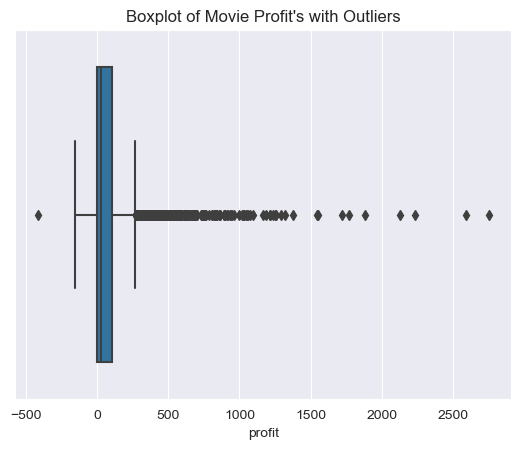

In [918]:
sns.boxplot(tmdb, x='profit')
plt.title("Boxplot of Movie Profit's with Outliers");

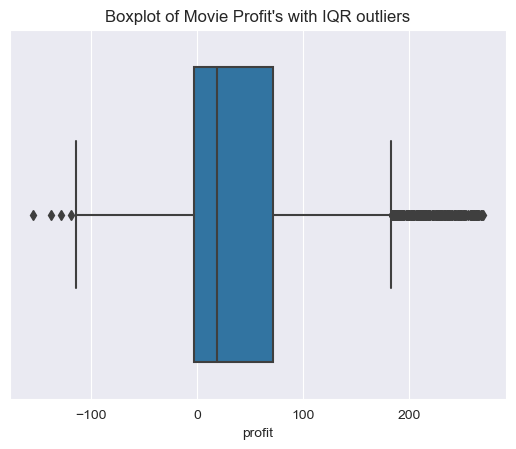

In [919]:
sns.boxplot(tmdb_IQR, x='profit')
plt.title("Boxplot of Movie Profit's with IQR outliers");

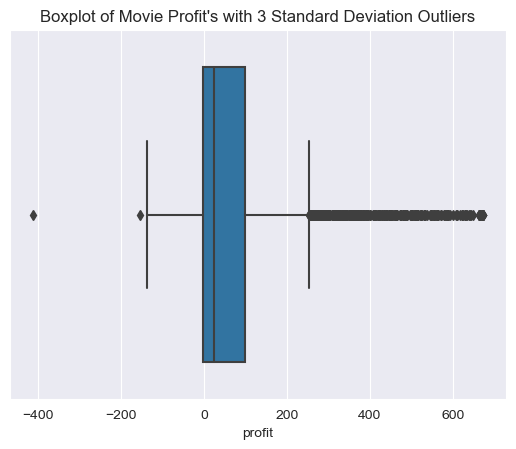

In [920]:
sns.boxplot(tmdb_Std, x='profit')
plt.title("Boxplot of Movie Profit's with 3 Standard Deviation Outliers");

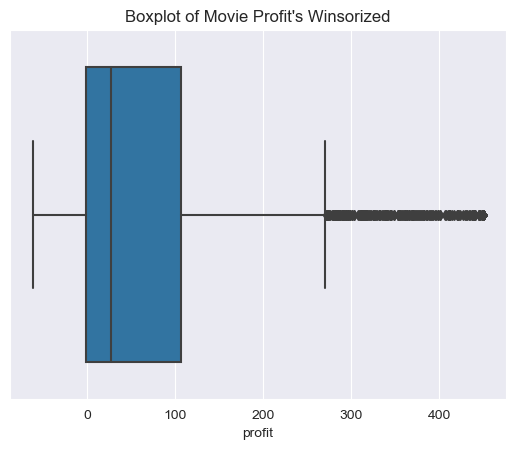

In [921]:
sns.boxplot(tmdb_wind, x='profit')
plt.title("Boxplot of Movie Profit's Winsorized");

In [922]:
tmdb = tmdb_wind.copy()

In [923]:
tmdb.shape

(3854, 11)

In [924]:
max_year = tmdb['release_year'].max()
min_year = tmdb['release_year'].min()
print(max_year, min_year)

2015 1960


In [925]:
tmdb.sort_values('vote_average', ascending=False)

,imdb_id,popularity,original_title,runtime,vote_count,vote_average,release_year,genres,revenue_adj,budget_adj,profit
4178,tt0111161,7.192039,The Shawshank Redemption,142,5754,8.4,1994,Drama|Crime,4.169346e+07,36.777789,4.915674
7948,tt0088178,0.283191,Stop Making Sense,88,23,8.4,1984,Documentary|Music,1.045097e+07,2.518850,7.932116
7269,tt0068646,5.738034,The Godfather,175,3970,8.3,1972,Drama|Crime,1.277914e+09,31.287366,450.376324
650,tt2582802,4.780419,Whiplash,105,2372,8.2,2014,Drama|Music,1.288891e+07,3.039600,9.849312
4179,tt0109830,6.715966,Forrest Gump,142,4856,8.1,1994,Comedy|Drama|Romance,9.973333e+08,80.911136,450.376324
...,...,...,...,...,...,...,...,...,...,...,...
7526,tt0799949,0.571060,Epic Movie,86,170,3.4,2007,Action|Adventure|Comedy,9.135378e+07,21.033372,70.320413
3134,tt1213644,0.812489,Disaster Movie,87,130,3.3,2008,Action|Comedy,1.428969e+07,25.319666,-11.029972
4540,tt1852770,0.543869,Dracula 3D,109,22,3.3,2012,Horror|Romance|Thriller,7.729969e+03,5.318568,-5.310838
4115,tt0295254,0.231392,FearDotCom,101,46,3.3,2002,Horror|Thriller,2.291418e+07,48.490456,-25.576273


In [926]:
#This filters the IMDB datasets to add the year to the actor information, and to filter only movies and actors and actresses

actors = imdb_principals.loc[(imdb_principals['category'].isin(['actress', 'actor']) & 
                              (imdb_principals['tconst'].isin(imdb_basics.loc[imdb_basics['titleType'] == 'movie']['tconst'])))]
actors = actors[['tconst', 'nconst']]
actors = actors.merge(imdb_names[['nconst', 'primaryName']], on='nconst')
actors = actors.join(imdb_basics.loc[imdb_basics['startYear'] != '\\N']['startYear'], how='inner')
#takes ~1min

In [927]:
tmdb = tmdb.merge(actors.groupby('tconst').agg(list)['primaryName'], left_on='imdb_id', right_index=True)

In [928]:
tmdb.head()

,imdb_id,popularity,original_title,runtime,vote_count,vote_average,release_year,genres,revenue_adj,budget_adj,profit,primaryName
0,tt0369610,32.985763,Jurassic World,124,5562,6.5,2015,Action|Adventure|Science Fiction|Thriller,1.392446e+09,137.999939,450.376324,"[Judy Greer, Chris Pratt, Bryce Dallas Howard,..."
1,tt1392190,28.419936,Mad Max: Fury Road,120,6185,7.1,2015,Action|Adventure|Science Fiction|Thriller,3.481613e+08,137.999939,210.161353,"[Charlize Theron, Tom Hardy]"
2,tt2908446,13.112507,Insurgent,119,2480,6.3,2015,Adventure|Science Fiction|Thriller,2.716190e+08,101.199956,170.419070,"[Kate Winslet, Shailene Woodley, Theo James, A..."
3,tt2488496,11.173104,Star Wars: The Force Awakens,136,5292,7.5,2015,Action|Adventure|Science Fiction|Fantasy,1.902723e+09,183.999919,450.376324,"[Oscar Isaac, Domhnall Gleeson]"
4,tt2820852,9.335014,Furious 7,137,2947,7.3,2015,Action|Crime|Thriller,1.385749e+09,174.799923,450.376324,"[Paul Walker, Jason Statham, Vin Diesel, Dwayn..."


In [929]:
actors.head()

,tconst,nconst,primaryName,startYear
0,tt0000009,nm0063086,Blanche Bayliss,1894
1,tt0000009,nm0183823,William Courtenay,1892
2,tt0006014,nm0183823,William Courtenay,1892
3,tt0006873,nm0183823,William Courtenay,1892
4,tt0007129,nm0183823,William Courtenay,1893


In [930]:
tmdb = tmdb.reset_index(drop='index')

In [931]:
#Sums actor/actress appearances in IMDB dataset, this decision was made because the IMDB data is more complete and this information has no impact on the limitation of TMDB data. 

def actor_ytd(id):
    cast = tmdb.loc[tmdb['imdb_id'] == id]['primaryName'].iloc[0]
    release = tmdb.loc[tmdb['imdb_id'] == id]['release_year'].iloc[0]
    
    short_actors = actors.loc[(actors['primaryName'].isin(cast))]
    df = short_actors.loc[short_actors['startYear'].astype(int) < release]
    return len(df)

actor_ytd('tt0105128')

0

In [932]:
tmdb['actor_sum'] = tmdb['imdb_id'].apply(actor_ytd)
#Take about 5 mins

In [933]:
tmdb

,imdb_id,popularity,original_title,runtime,vote_count,vote_average,release_year,genres,revenue_adj,budget_adj,profit,primaryName,actor_sum
0,tt0369610,32.985763,Jurassic World,124,5562,6.5,2015,Action|Adventure|Science Fiction|Thriller,1.392446e+09,137.999939,450.376324,"[Judy Greer, Chris Pratt, Bryce Dallas Howard,...",87
1,tt1392190,28.419936,Mad Max: Fury Road,120,6185,7.1,2015,Action|Adventure|Science Fiction|Thriller,3.481613e+08,137.999939,210.161353,"[Charlize Theron, Tom Hardy]",87
2,tt2908446,13.112507,Insurgent,119,2480,6.3,2015,Adventure|Science Fiction|Thriller,2.716190e+08,101.199956,170.419070,"[Kate Winslet, Shailene Woodley, Theo James, A...",58
3,tt2488496,11.173104,Star Wars: The Force Awakens,136,5292,7.5,2015,Action|Adventure|Science Fiction|Fantasy,1.902723e+09,183.999919,450.376324,"[Oscar Isaac, Domhnall Gleeson]",52
4,tt2820852,9.335014,Furious 7,137,2947,7.3,2015,Action|Crime|Thriller,1.385749e+09,174.799923,450.376324,"[Paul Walker, Jason Statham, Vin Diesel, Dwayn...",132
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3812,tt0061184,0.670274,Who's Afraid of Virginia Woolf?,131,74,7.5,1966,Drama,2.266436e+08,50.385110,176.258462,"[Elizabeth Taylor, Richard Burton, George Sega...",72
3813,tt0061107,0.402730,Torn Curtain,128,46,6.3,1966,Mystery|Thriller,8.733419e+07,20.154044,67.180147,"[Paul Newman, Hansjörg Felmy, Lila Kedrova, Ju...",31
3814,tt0061619,0.395668,El Dorado,120,36,6.9,1966,Action|Western,4.030809e+07,31.258922,9.049166,"[John Wayne, Robert Mitchum, James Caan, Charl...",145
3815,tt0060934,0.299911,The Sand Pebbles,182,28,7.0,1966,Action|Adventure|Drama|War|Romance,1.343603e+08,80.616176,53.744117,"[Richard Attenborough, Richard Crenna, Steve M...",50


In [934]:
actor_count = oscars.loc[oscars['category'].isin(['ACTOR', 'ACTOR IN A SUPPORTING ROLE', 'ACTRESS', 'ACTRESS IN A SUPPORTING ROLE', 'ACTOR IN A LEADING ROLE', 'ACTRESS IN A LEADING ROLE'])][['year_ceremony', 'name', 'winner']]
actor_count.head()

,year_ceremony,name,winner
0,1928,Richard Barthelmess,False
1,1928,Emil Jannings,True
2,1928,Louise Dresser,False
3,1928,Janet Gaynor,True
4,1928,Gloria Swanson,False


In [935]:
oscars['category'].unique()

array(['ACTOR', 'ACTRESS', 'ART DIRECTION', 'CINEMATOGRAPHY',
       'DIRECTING (Comedy Picture)', 'DIRECTING (Dramatic Picture)',
       'ENGINEERING EFFECTS', 'OUTSTANDING PICTURE',
       'UNIQUE AND ARTISTIC PICTURE', 'WRITING (Adaptation)',
       'WRITING (Original Story)', 'WRITING (Title Writing)',
       'SPECIAL AWARD', 'DIRECTING', 'WRITING', 'OUTSTANDING PRODUCTION',
       'SOUND RECORDING', 'SHORT SUBJECT (Cartoon)',
       'SHORT SUBJECT (Comedy)', 'SHORT SUBJECT (Novelty)',
       'ASSISTANT DIRECTOR', 'FILM EDITING', 'MUSIC (Scoring)',
       'MUSIC (Song)', 'DANCE DIRECTION', 'WRITING (Screenplay)',
       'ACTOR IN A SUPPORTING ROLE', 'ACTRESS IN A SUPPORTING ROLE',
       'SHORT SUBJECT (Color)', 'SHORT SUBJECT (One-reel)',
       'SHORT SUBJECT (Two-reel)', 'IRVING G. THALBERG MEMORIAL AWARD',
       'MUSIC (Original Score)', 'CINEMATOGRAPHY (Black-and-White)',
       'CINEMATOGRAPHY (Color)', 'SPECIAL EFFECTS',
       'ART DIRECTION (Black-and-White)', 'ART DIRECT

In [936]:
tmdb.loc[tmdb['imdb_id'] == 'tt1617661']['primaryName'].iloc[0]

['Sean Bean', 'Mila Kunis', 'Eddie Redmayne', 'Channing Tatum']

In [937]:
def oscar_helper(id):
    release = tmdb.loc[tmdb['imdb_id'] == id]['release_year'].iloc[0]
    cast = tmdb.loc[tmdb['imdb_id'] == id]['primaryName'].iloc[0]
    
    actors_filtered = actor_count.loc[actor_count['year_ceremony'] <= release]
    actors_filtered = actors_filtered.loc[actors_filtered['name'].isin(cast)]
    
    return actors_filtered

def oscar_nominations(id):
    return len(oscar_helper(id))
    
def oscar_wins(id):
    return sum(oscar_helper(id)['winner'].astype(int))

oscar_helper('tt1617661')['winner']

9644    True
Name: winner, dtype: bool

In [938]:
tmdb['oscar_nomination'] = tmdb['imdb_id'].apply(oscar_nominations)
tmdb['oscar_wins'] = tmdb['imdb_id'].apply(oscar_wins)

In [939]:
X_features = np.array(['oscar_wins', 'actor_sum', 'oscar_nomination', 'runtime', 'budget_adj'])

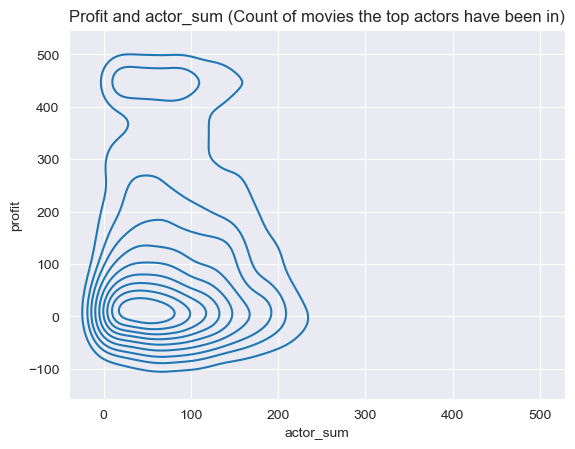

In [940]:
sns.kdeplot(data=tmdb, x='actor_sum', y='profit')
plt.title('Profit and actor_sum (Count of movies the top actors have been in)');

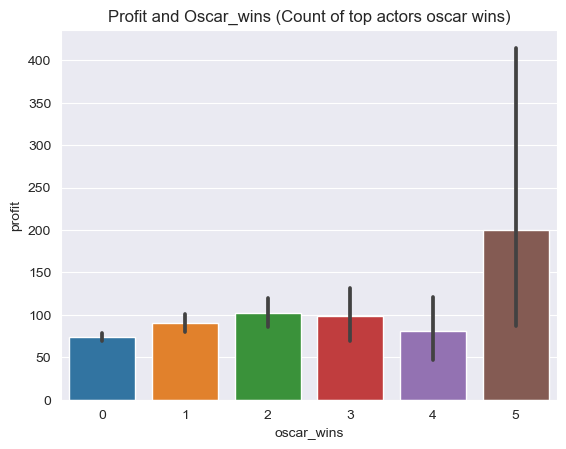

In [941]:
sns.barplot(data=tmdb, x='oscar_wins', y='profit')
plt.title('Profit and Oscar_wins (Count of top actors oscar wins)');

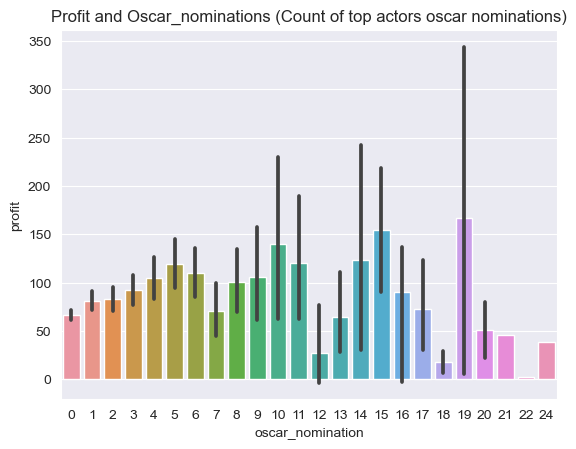

In [942]:
sns.barplot(data=tmdb, x='oscar_nomination', y='profit')
plt.title('Profit and Oscar_nominations (Count of top actors oscar nominations)');

In [943]:
tmdb.index

RangeIndex(start=0, stop=3817, step=1)

In [964]:
from sklearn.preprocessing import  MultiLabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.sparse import csr_matrix

def string_to_list(df, label):
    return df[label].apply(lambda x : x.split('|'))

def simple_process(df):
    
    df = df.copy()
    
    sc = StandardScaler(with_mean=False)
    mb = MultiLabelBinarizer()
    mms = MinMaxScaler()
    
    sc_y = StandardScaler(with_mean=False)
    
    df['genres'] = string_to_list(df, 'genres')
    
    gen_cat = mb.fit_transform(df['genres'])
    gen_cat = pd.DataFrame(gen_cat, columns=mb.classes_)
    
    cat = mb.fit_transform(df['primaryName'])
    cat = pd.DataFrame(cat, columns=mb.classes_)
    cat_sum = cat.sum()
    cat = cat[cat_sum.index[cat_sum > cat_sum.mean()]]

    combine_mb = df[X_features].merge(gen_cat, right_index=True, left_index=True)
    combine_mb = combine_mb.merge(cat, right_index=True, left_index=True)
    
    out_sc = sc.fit_transform(combine_mb)

    out_sc = pd.DataFrame(out_sc, columns=sc.get_feature_names_out())
    
    out_sc['profit'] = sc_y.fit_transform(df['profit'].values.reshape(-1,1))


    return out_sc, sc_y

cleaned, scaler = simple_process(tmdb)

In [965]:
cleaned.shape

(3817, 1412)

In [966]:
from sklearn.model_selection import train_test_split

X, y = cleaned.drop('profit', axis=1), cleaned['profit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [967]:
names = X_train.columns

In [968]:
from sklearn.linear_model import LassoCV

lcv = LassoCV(cv=5, random_state=42)

lcv.fit(csr_matrix(X_train), y_train.ravel())
#Takes about 3 mins

LassoCV(cv=5, random_state=42)

In [969]:
las_sel = pd.DataFrame(lcv.coef_, index=names, columns={'lasso_coef' : 0})
las_sel = las_sel.loc[las_sel['lasso_coef'] > .001]
las_sel

,lasso_coef
runtime,0.126760
budget_adj,0.331438
Adventure,0.009442
Animation,0.064844
Family,0.017344
...,...
Tyrese Gibson,0.006479
Whoopi Goldberg,0.016020
Will Poulter,0.012230
Will Smith,0.036848


In [970]:
lasso_features = las_sel.index
X_train = X_train[lasso_features]
X_test = X_test[lasso_features]

In [971]:
((X_train.corr() - np.eye(len(X_train.corr()))) > .4).sum().value_counts()

0    81
1    18
2     3
Name: count, dtype: int64

In [972]:
((X_train.corr() - np.eye(len(X_train.corr()))) > .4).sum().sort_values(ascending=False)

Talia Shire             2
Burt Young              2
Carl Weathers           2
Daniel Radcliffe        1
Taylor Lautner          1
                       ..
Joan Plowright          0
Irrfan Khan             0
Helena Bonham Carter    0
Helen Hunt              0
Willem Dafoe            0
Length: 102, dtype: int64

In [973]:
colinear = ['Talia Shire', 'Rupert Grint', 'David Schwimmer', 'Liam Hemsworth', 'Tyrese Gibson', 'Leonard Nimoy', 'Ray Romano', 'Adventure', 'Family', 'Burt Young', 'Taylor Lautner']
dropper = X_train.drop(colinear, axis=1)
((dropper.corr() - np.eye(len(dropper.corr()))) > .4).sum().sort_values(ascending=False)

runtime              0
Richard Harris       0
Richard Armitage     0
Rhys Ifans           0
Phil Harris          0
                    ..
Harold Ramis         0
Haley Joel Osment    0
George Kennedy       0
George C. Scott      0
Willem Dafoe         0
Length: 91, dtype: int64

In [974]:
X_train = X_train.drop(colinear, axis=1)
X_test = X_test.drop(colinear, axis=1)

In [975]:
X_train

,runtime,budget_adj,Animation,Music,Anne Archer,Anne Hathaway,Ben Stiller,Billy Crystal,Bradley Cooper,Carl Weathers,...,T.J. Miller,Ted Levine,Teri Garr,Teri Polo,Tom Cruise,Tom Hanks,Whoopi Goldberg,Will Poulter,Will Smith,Willem Dafoe
700,4.737642,2.627326,4.55289,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.801638,0.0,0.0,0.0,0.0
2044,5.819061,1.130170,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
644,4.737642,0.468310,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3218,6.282526,0.745781,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3393,3.553232,0.505772,4.55289,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,5.767564,1.124138,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1294,6.385518,1.892381,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
860,6.179533,1.318214,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3507,6.385518,0.632503,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [976]:
y_test.values

array([ 3.08065960e+00,  3.41709204e+00, -6.91048119e-03, -1.17657523e-02,
       -3.02568055e-01,  1.94897043e+00, -1.25524089e-01,  2.61723262e+00,
        1.98230583e+00,  1.03414070e+00,  7.35448243e-09, -1.23392647e-01,
       -2.34339107e-01,  1.49436395e+00,  1.84555106e-01,  1.71967613e-01,
       -3.93290100e-01,  3.53863968e+00,  2.97919060e-01,  1.51667438e-03,
        3.69358544e-01,  1.44158843e+00,  2.66536144e-02,  3.53863968e+00,
       -8.20667386e-02,  2.09116552e+00,  7.15064377e-01,  1.32006628e-01,
        6.44171468e-01, -4.18770916e-01,  3.76017533e-01,  9.25550119e-02,
       -6.90759929e-02,  6.75504149e-01,  3.53863968e+00,  5.32359330e-01,
        3.34088100e-03,  3.97876927e-02,  2.14853541e-01,  1.44078459e-01,
        3.44403048e-01,  3.85332870e-01,  4.06851799e-01,  1.29408653e+00,
        2.42238331e-01,  2.44263902e-01,  3.49635676e+00, -9.09581352e-02,
        4.54427578e-02, -3.91606386e-01,  4.36238624e-01,  5.42295469e-01,
        5.85724165e-01,  

In [977]:
y_test_actual = scaler.inverse_transform(y_test.values.reshape(1,-1))

In [1006]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

model_one = sm.GLM(y_train, sm.add_constant(X_train, has_constant='add')).fit()
print(model_one.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 profit   No. Observations:                 3053
Model:                            GLM   Df Residuals:                     2961
Model Family:                Gaussian   Df Model:                           91
Link Function:               Identity   Scale:                         0.61101
Method:                          IRLS   Log-Likelihood:                -3533.3
Date:                Mon, 11 Dec 2023   Deviance:                       1809.2
Time:                        22:36:57   Pearson chi2:                 1.81e+03
No. Iterations:                     3   Pseudo R-squ. (CS):             0.4781
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.4049 

In [1007]:
pred = model_one.predict(sm.add_constant(X_test, has_constant='add'))
MSE = mean_squared_error(y_true=y_test, y_pred=pred)
MAE = mean_absolute_error(y_true=y_test, y_pred=pred)
display(np.sqrt(MSE),MAE) 

0.9535589242590318

0.6496502847851445

In [1008]:
aic_GLM = model_one.aic
aic_GLM

7250.589213135677

In [1009]:
#GLM
MSE = mean_squared_error(y_true=y_test_actual, y_pred=scaler.inverse_transform(pd.Series(pred).values.reshape(1, -1)))
np.sqrt(MSE)

121.36312325097859

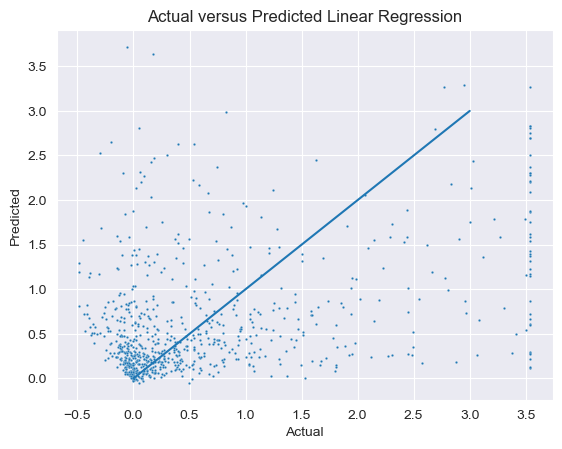

In [982]:
sns.scatterplot(x=y_test, y=pred, s=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.plot([0,3],[0,3])
plt.title('Actual versus Predicted Linear Regression');

In [983]:
model_two = sm.GLM(y_train, sm.add_constant(X_train, has_constant='add'), family=sm.families.Poisson()).fit()
print(model_two.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 profit   No. Observations:                 3053
Model:                            GLM   Df Residuals:                     2961
Model Family:                 Poisson   Df Model:                           91
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2767.9
Date:                Mon, 11 Dec 2023   Deviance:                       10366.
Time:                        22:28:37   Pearson chi2:                 3.07e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3713
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -2.3291 

In [984]:
pred = model_two.predict(sm.add_constant(X_test, has_constant='add'))
MSE = mean_squared_error(y_true=y_test, y_pred=pred)
MAE = mean_absolute_error(y_true=y_test, y_pred=pred)
display(np.sqrt(MSE),MAE)

0.996351024134202

0.6577356227908009

In [985]:
aic_Poisson = model_two.aic
aic_Poisson

5719.711275570056

In [986]:
#Poisson
MSE = mean_squared_error(y_true=y_test_actual, y_pred=scaler.inverse_transform(pd.Series(pred).values.reshape(1, -1)))
np.sqrt(MSE)

126.80943889985578

In [987]:
error = abs(pred - y_test).sort_values(ascending=False)
errors = tmdb.loc[error.index][
    ['original_title', 'release_year', 'genres', 'budget_adj', 'profit', 'primaryName', 'actor_sum', 'oscar_nomination',
     'oscar_wins']]
errors['predicted'] = np.transpose(scaler.inverse_transform(pd.Series(pred).values.reshape(1,-1)))
errors.head(10)

,original_title,release_year,genres,budget_adj,profit,primaryName,actor_sum,oscar_nomination,oscar_wins,predicted
1767,Speed 2: Cruise Control,1997,Action|Adventure|Thriller,217.353651,6.124029,"[Willem Dafoe, Jason Patric, Temuera Morrison,...",130,1,0,60.846931
1650,The Last Samurai,2003,Drama|Action|War|History,165.949370,375.471096,"[William Atherton, Billy Connolly, Tom Cruise,...",100,3,0,47.027170
3043,Flipper,1996,Adventure|Family,35.492233,-7.576653,"[Jonathan Banks, Paul Hogan, Elijah Wood, Robe...",10,0,0,33.273433
2972,Independence Day,1996,Action|Adventure|Science Fiction,104.266255,450.376324,"[Jeff Goldblum, Mary McDonnell, Bill Pullman, ...",75,2,0,32.751996
1511,John Carter,2012,Action|Adventure|Fantasy|Science Fiction,246.933513,22.925972,"[Willem Dafoe, Samantha Morton, Lynn Collins, ...",124,4,0,252.244027
862,Crocodile Dundee in Los Angeles,2001,Adventure|Comedy,26.045974,22.522285,"[Jonathan Banks, Paul Hogan, Linda Kozlowski, ...",19,0,0,119.537731
3779,Love Story,1970,Drama|Romance,12.356010,450.376324,"[Ray Milland, John Marley, Ryan O'Neal, Ali Ma...",78,1,1,100.702084
3770,American Graffiti,1973,Comedy|Drama,3.815971,450.376324,"[Ron Howard, Richard Dreyfuss, Paul Le Mat, Ch...",31,0,0,165.913434
3697,The Graduate,1967,Comedy|Drama|Romance,19.610291,450.376324,"[Anne Bancroft, William Daniels, Katharine Ros...",13,2,1,120.734095
3591,Home Alone,1990,Comedy|Family,30.040174,450.376324,"[Joe Pesci, John Heard, Daniel Stern, Macaulay...",19,1,0,43.204275


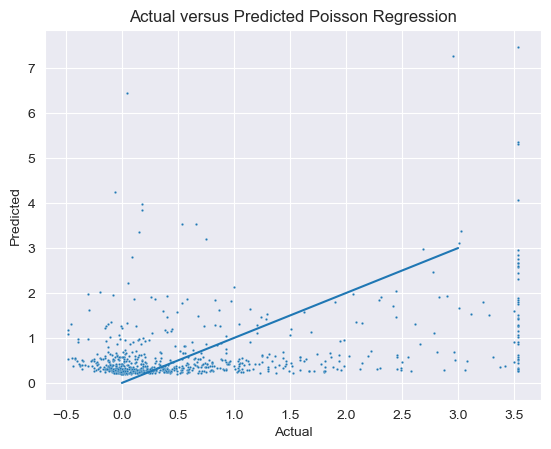

In [988]:
sns.scatterplot(x=y_test, y=pred, s=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.plot([0,3],[0,3])
plt.title('Actual versus Predicted Poisson Regression');

In [989]:
model_three = sm.NegativeBinomial(y_train, sm.add_constant(X_train, has_constant='add'), loglike_method='geometric').fit()
print(model_three.summary())

Optimization terminated successfully.
         Current function value: 0.939203
         Iterations: 19
         Function evaluations: 21
         Gradient evaluations: 21
                     NegativeBinomial Regression Results                      
Dep. Variable:                 profit   No. Observations:                 3053
Model:               NegativeBinomial   Df Residuals:                     2961
Method:                           MLE   Df Model:                           91
Date:                Mon, 11 Dec 2023   Pseudo R-squ.:                  0.1246
Time:                        22:28:39   Log-Likelihood:                -2867.4
converged:                       True   LL-Null:                       -3275.6
Covariance Type:            nonrobust   LLR p-value:                5.185e-117
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const             

In [990]:
pred = model_three.predict(sm.add_constant(X_test, has_constant='add'))
MSE = mean_squared_error(y_true=y_test, y_pred=pred)
MAE = mean_absolute_error(y_true=y_test, y_pred=pred)
display(np.sqrt(MSE),MAE)

1.0365242833226456

0.6612611329265813

In [991]:
aic_NegativeBinomial = model_three.aic
aic_NegativeBinomial

5918.7754699785655

In [992]:
#Negative Binomial
MSE = mean_squared_error(y_true=y_test_actual, y_pred=scaler.inverse_transform(pd.Series(pred).values.reshape(1,-1)))
np.sqrt(MSE)

131.92244459068834

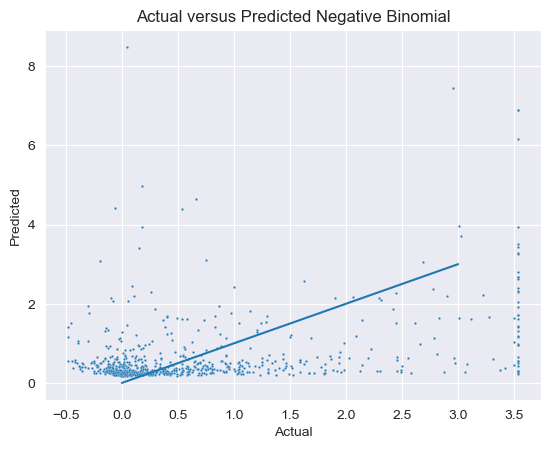

In [993]:
sns.scatterplot(x=y_test, y=pred, s=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.plot([0,3],[0,3])
plt.title('Actual versus Predicted Negative Binomial');

In [994]:
error = abs(pred - y_test).sort_values(ascending=False)
errors = tmdb.loc[error.index][
    ['original_title', 'release_year', 'genres', 'budget_adj', 'profit', 'primaryName', 'actor_sum', 'oscar_nomination',
     'oscar_wins']]
errors['predicted'] = np.transpose(scaler.inverse_transform(pd.Series(pred).values.reshape(1,-1)))
errors.head()

,original_title,release_year,genres,budget_adj,profit,primaryName,actor_sum,oscar_nomination,oscar_wins,predicted
1767,Speed 2: Cruise Control,1997,Action|Adventure|Thriller,217.353651,6.124029,"[Willem Dafoe, Jason Patric, Temuera Morrison,...",130,1,0,61.309452
1511,John Carter,2012,Action|Adventure|Fantasy|Science Fiction,246.933513,22.925972,"[Willem Dafoe, Samantha Morton, Lynn Collins, ...",124,4,0,46.905569
1650,The Last Samurai,2003,Drama|Action|War|History,165.949370,375.471096,"[William Atherton, Billy Connolly, Tom Cruise,...",100,3,0,30.263540
3043,Flipper,1996,Adventure|Family,35.492233,-7.576653,"[Jonathan Banks, Paul Hogan, Elijah Wood, Robe...",10,0,0,30.566301
1777,Conspiracy Theory,1997,Action|Drama|Mystery|Thriller,101.884524,84.201221,"[Patrick Stewart, Mel Gibson, Julia Roberts, C...",126,2,0,247.167010


In [995]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


rf = RandomForestRegressor(random_state= 42)

params = {
    'n_estimators' : [100],
    'criterion':['squared_error', 'absolute_error'],
    'max_depth':[50,None],
    'min_samples_split':[2],
    'min_samples_leaf':[1],
    'min_weight_fraction_leaf':[0.0],
    'max_features':[1,3],
    'max_leaf_nodes':[4,None],
    'min_impurity_decrease':[0.0],
    'bootstrap':[True],
    'oob_score':[False],
    'n_jobs':[None],
    'warm_start':[False],
    'ccp_alpha':[0.0],
    'max_samples':[None]
}

gs_rf = GridSearchCV(rf, param_grid=params, verbose=1)

gs_rf.fit(X_train, y_train.ravel())

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(estimator=RandomForestRegressor(random_state=42),
             param_grid={'bootstrap': [True], 'ccp_alpha': [0.0],
                         'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [50, None], 'max_features': [1, 3],
                         'max_leaf_nodes': [4, None], 'max_samples': [None],
                         'min_impurity_decrease': [0.0],
                         'min_samples_leaf': [1], 'min_samples_split': [2],
                         'min_weight_fraction_leaf': [0.0],
                         'n_estimators': [100], 'n_jobs': [None],
                         'oob_score': [False], 'warm_start': [False]},
             verbose=1)

In [1010]:
best_rf = gs_rf.best_estimator_
best_rf

RandomForestRegressor(max_depth=50, max_features=1, random_state=42)

In [1011]:
#Random Forest
pred = best_rf.predict(X_test)
MSE = mean_squared_error(y_true=y_test, y_pred=pred)
MAE = mean_absolute_error(y_true=y_test, y_pred=pred)
display(np.sqrt(MSE),MAE)

0.9174388463468472

0.6582965964055656

In [1012]:
analysis_rf = pd.DataFrame(best_rf.feature_importances_).rename({0 : 'importance'}, axis=1)
analysis_rf.loc[:, 'columns'] = pd.DataFrame(X_train).columns
analysis_rf.sort_values('importance', ascending=False)

,importance,columns
1,0.331206,budget_adj
0,0.210376,runtime
2,0.035936,Animation
85,0.017151,Tom Cruise
86,0.012316,Tom Hanks
...,...,...
21,0.001645,Ed Helms
77,0.001609,Rowan Atkinson
69,0.001431,Robert Carlyle
51,0.001356,Maggie Grace


In [1013]:
error = abs(pred - y_test).sort_values(ascending=False)
errors = tmdb.loc[error.index][
    ['original_title', 'release_year', 'genres', 'budget_adj', 'profit', 'primaryName', 'actor_sum', 'oscar_nomination',
     'oscar_wins']]
errors['predicted'] = np.transpose(scaler.inverse_transform(pd.Series(pred).values.reshape(1,-1)))
errors.head(10)

,original_title,release_year,genres,budget_adj,profit,primaryName,actor_sum,oscar_nomination,oscar_wins,predicted
3779,Love Story,1970,Drama|Romance,12.356010,450.376324,"[Ray Milland, John Marley, Ryan O'Neal, Ali Ma...",78,1,1,56.328280
3770,American Graffiti,1973,Comedy|Drama,3.815971,450.376324,"[Ron Howard, Richard Dreyfuss, Paul Le Mat, Ch...",31,0,0,49.314224
1414,The Mask,1994,Romance|Comedy|Crime|Fantasy,33.835566,450.376324,"[Peter Riegert, Jim Carrey, Peter Greene, Came...",120,0,0,41.930951
3697,The Graduate,1967,Comedy|Drama|Romance,19.610291,450.376324,"[Anne Bancroft, William Daniels, Katharine Ros...",13,2,1,44.134730
3591,Home Alone,1990,Comedy|Family,30.040174,450.376324,"[Joe Pesci, John Heard, Daniel Stern, Macaulay...",19,1,0,207.020163
3164,E.T. the Extra-Terrestrial,1982,Science Fiction|Adventure|Family|Fantasy,23.726245,450.376324,"[Dee Wallace, Henry Thomas, Drew Barrymore, Pe...",205,0,0,97.093783
3285,Back to the Future Part II,1989,Adventure|Comedy|Family|Science Fiction|Action,70.359398,450.376324,"[Christopher Lloyd, Lea Thompson, Michael J. F...",31,0,0,89.039963
1425,The Flintstones,1994,Fantasy|Comedy|Family,67.671132,434.906488,"[Rick Moranis, John Goodman, Halle Berry, Rosi...",52,0,0,196.077455
3791,On Her Majesty's Secret Service,1969,Adventure|Action|Thriller,41.609849,445.668195,"[Gabriele Ferzetti, Telly Savalas, Diana Rigg,...",22,1,0,111.441381
2527,The Godfather,1972,Drama|Crime,31.287366,450.376324,"[Marlon Brando, James Caan, Diane Keaton, Al P...",29,5,1,54.751852


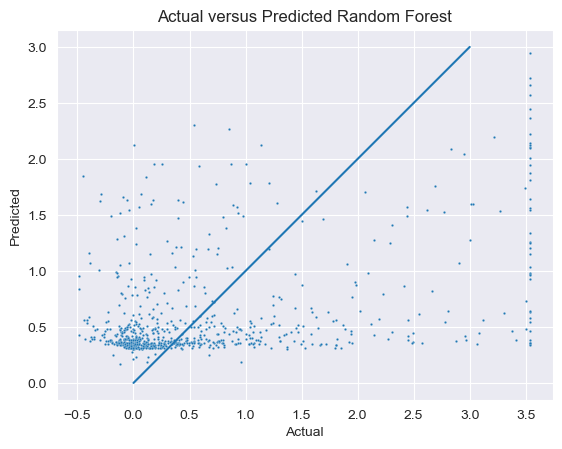

In [1014]:
sns.scatterplot(x=y_test, y=pred, s=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.plot([0,3],[0,3])
plt.title('Actual versus Predicted Random Forest');

In [1015]:
MSE = mean_squared_error(y_true=y_test_actual, y_pred=scaler.inverse_transform(pd.Series(pred).values.reshape(1,-1)))
np.sqrt(MSE)

116.76598157890236

In [1001]:
from sklearn.neural_network import MLPRegressor


mlp = MLPRegressor(random_state= 42)

params = {
    'hidden_layer_sizes': [(100,), (50,)],
    'activation':['relu', 'logistic'],
    'solver':['adam', 'lbfgs'],
    'alpha':[0.0001],
    'batch_size':['auto'],
    'learning_rate':['constant'],
    'learning_rate_init':[0.001],
    'power_t':[0.5],
    'max_iter':[2000],
    'shuffle':[True],
    'random_state':[None],
    'tol':[0.0001],
    'verbose':[False],
    'warm_start':[False],
    'momentum':[0.9],
    'nesterovs_momentum':[True],
    'early_stopping':[False],
    'validation_fraction':[0.1],
    'beta_1':[0.9],
    'beta_2':[0.999],
    'epsilon':[1e-08],
    'n_iter_no_change':[10],
    'max_fun':[15000]
}

gs_mlp = GridSearchCV(mlp, param_grid=params, verbose=1)

gs_mlp.fit(X_train, y_train.ravel())

Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\Users\Ryan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Ryan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Ryan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERAT

GridSearchCV(estimator=MLPRegressor(random_state=42),
             param_grid={'activation': ['relu', 'logistic'], 'alpha': [0.0001],
                         'batch_size': ['auto'], 'beta_1': [0.9],
                         'beta_2': [0.999], 'early_stopping': [False],
                         'epsilon': [1e-08],
                         'hidden_layer_sizes': [(100,), (50,)],
                         'learning_rate': ['constant'],
                         'learning_rate_init': [0.001], 'max_fun': [15000],
                         'max_iter': [2000], 'momentum': [0.9],
                         'n_iter_no_change': [10], 'nesterovs_momentum': [True],
                         'power_t': [0.5], 'random_state': [None],
                         'shuffle': [True], 'solver': ['adam', 'lbfgs'],
                         'tol': [0.0001], 'validation_fraction': [0.1],
                         'verbose': [False], 'warm_start': [False]},
             verbose=1)

In [1016]:
best_mlp = gs_mlp.best_estimator_
best_mlp

MLPRegressor(max_iter=2000)

In [1017]:
#MLP regression
pred = best_mlp.predict(X_test)
MSE = mean_squared_error(y_true=y_test, y_pred=pred)
MAE = mean_absolute_error(y_true=y_test, y_pred=pred)
display(np.sqrt(MSE),MAE)

0.9591722992728307

0.6476901189747214

In [1018]:
error = abs(pred - y_test).sort_values(ascending=False)
errors = tmdb.loc[error.index][
    ['original_title', 'release_year', 'genres', 'budget_adj', 'profit', 'primaryName', 'actor_sum', 'oscar_nomination',
     'oscar_wins']]
errors['predicted'] = np.transpose(scaler.inverse_transform(pd.Series(pred).values.reshape(1,-1)))
errors.head(10)

,original_title,release_year,genres,budget_adj,profit,primaryName,actor_sum,oscar_nomination,oscar_wins,predicted
1511,John Carter,2012,Action|Adventure|Fantasy|Science Fiction,246.933513,22.925972,"[Willem Dafoe, Samantha Morton, Lynn Collins, ...",124,4,0,69.277883
3137,The Art of War,2000,Action|Adventure|Thriller,50.651685,-12.410796,"[Donald Sutherland, Anne Archer, Maury Chaykin...",104,1,0,55.193335
3043,Flipper,1996,Adventure|Family,35.492233,-7.576653,"[Jonathan Banks, Paul Hogan, Elijah Wood, Robe...",10,0,0,30.771314
862,Crocodile Dundee in Los Angeles,2001,Adventure|Comedy,26.045974,22.522285,"[Jonathan Banks, Paul Hogan, Linda Kozlowski, ...",19,0,0,32.351050
1767,Speed 2: Cruise Control,1997,Action|Adventure|Thriller,217.353651,6.124029,"[Willem Dafoe, Jason Patric, Temuera Morrison,...",130,1,0,278.143059
3324,Next of Kin,1989,Adventure|Drama|Action|Thriller,21.107819,6.935023,"[Adam Baldwin, Patrick Swayze, Liam Neeson, He...",43,0,0,137.536029
3779,Love Story,1970,Drama|Romance,12.356010,450.376324,"[Ray Milland, John Marley, Ryan O'Neal, Ali Ma...",78,1,1,118.120978
3770,American Graffiti,1973,Comedy|Drama,3.815971,450.376324,"[Ron Howard, Richard Dreyfuss, Paul Le Mat, Ch...",31,0,0,198.310701
3697,The Graduate,1967,Comedy|Drama|Romance,19.610291,450.376324,"[Anne Bancroft, William Daniels, Katharine Ros...",13,2,1,115.912334
3591,Home Alone,1990,Comedy|Family,30.040174,450.376324,"[Joe Pesci, John Heard, Daniel Stern, Macaulay...",19,1,0,45.904062


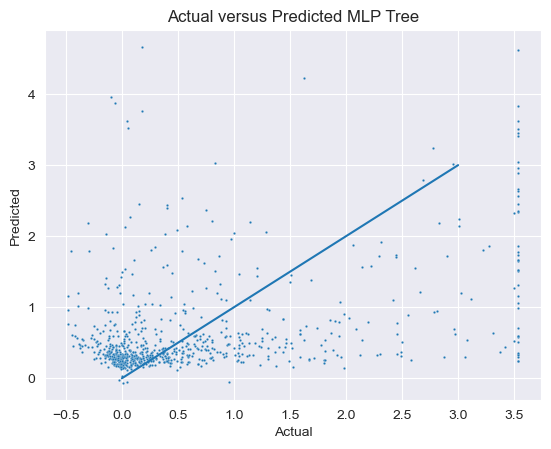

In [1019]:
sns.scatterplot(x=y_test, y=pred, s=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.plot([0,3],[0,3])
plt.title('Actual versus Predicted MLP Tree');

In [1020]:
MSE = mean_squared_error(y_true=y_test_actual, y_pred=scaler.inverse_transform(pd.Series(pred).values.reshape(1,-1)))
np.sqrt(MSE)

122.07755914615204